In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_dynamics_dual_axis(csv_path, model_name, window_size=5) :
    df = pd.read_csv(csv_path)

    mi_col = next((c for c in df.columns if 'mi' in c.lower()), None)
    ent_col = next((c for c in df.columns if 'entropy' in c.lower()), None)

    x = df.index

    mi_data = df[mi_col]
    mi_mean = mi_data.rolling(window=window_size).mean()
    mi_std = mi_data.rolling(window=window_size).std()

    ent_data = df[ent_col]
    ent_mean = ent_data.rolling(window=window_size).mean()
    ent_std = ent_data.rolling(window=window_size).std()

    fig, ax1 = plt.subplots(figsize=(12, 8))

    color_1 = 'tab:blue'
    ax1.set_xlabel('Episode (Batch)', fontsize=14)
    ax1.set_ylabel('$I(A; \\tilde{Y})$ (MI-TET proxy)', color=color_1, fontsize=14)

    line1, = ax1.plot(x, mi_mean, color=color_1, linewidth=2, label='$I(A; \\tilde{Y})$ (Rolling)')
    ax1.fill_between(x, mi_mean - mi_std, mi_mean + mi_std, color=color_1, alpha=0.2)
    ax1.tick_params(axis='y', labelcolor=color_1)

    ax2 = ax1.twinx()
    color_2 = 'tab:orange'
    ax2.set_ylabel('$\\mathbb{E}[H(A|S)]$ (Policy Entropy)', color=color_2, fontsize=14)

    line2, = ax2.plot(x, ent_mean, color=color_2, linewidth=2, label='$\\mathbb{E}[H(A|S)]$ (Rolling)')
    ax2.fill_between(x, ent_mean - ent_std, ent_mean + ent_std, color=color_2, alpha=0.2)
    ax2.tick_params(axis='y', labelcolor=color_2)

    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper center', fontsize=18, framealpha=0.8)

    ax1.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'dynamics_{model_name}.png', dpi=300)
    plt.show()

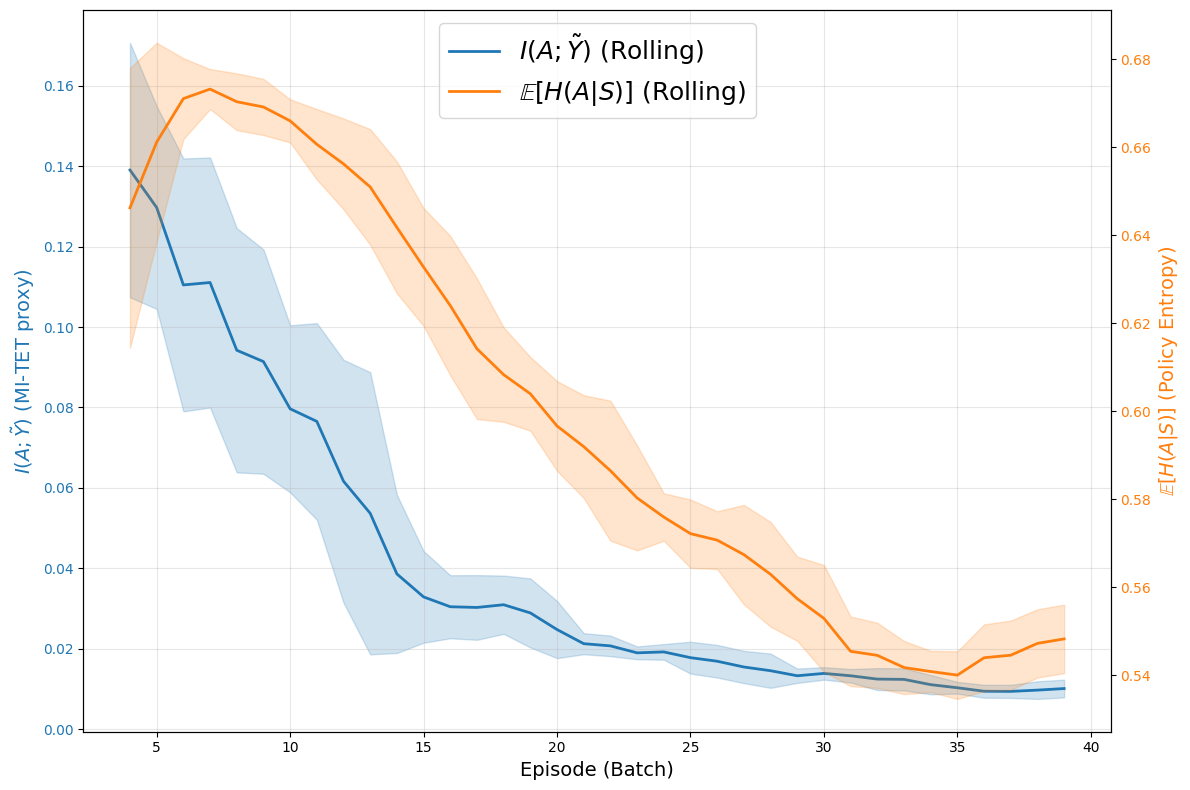

In [28]:
plot_dynamics_dual_axis('resuls_default.csv', 'default')

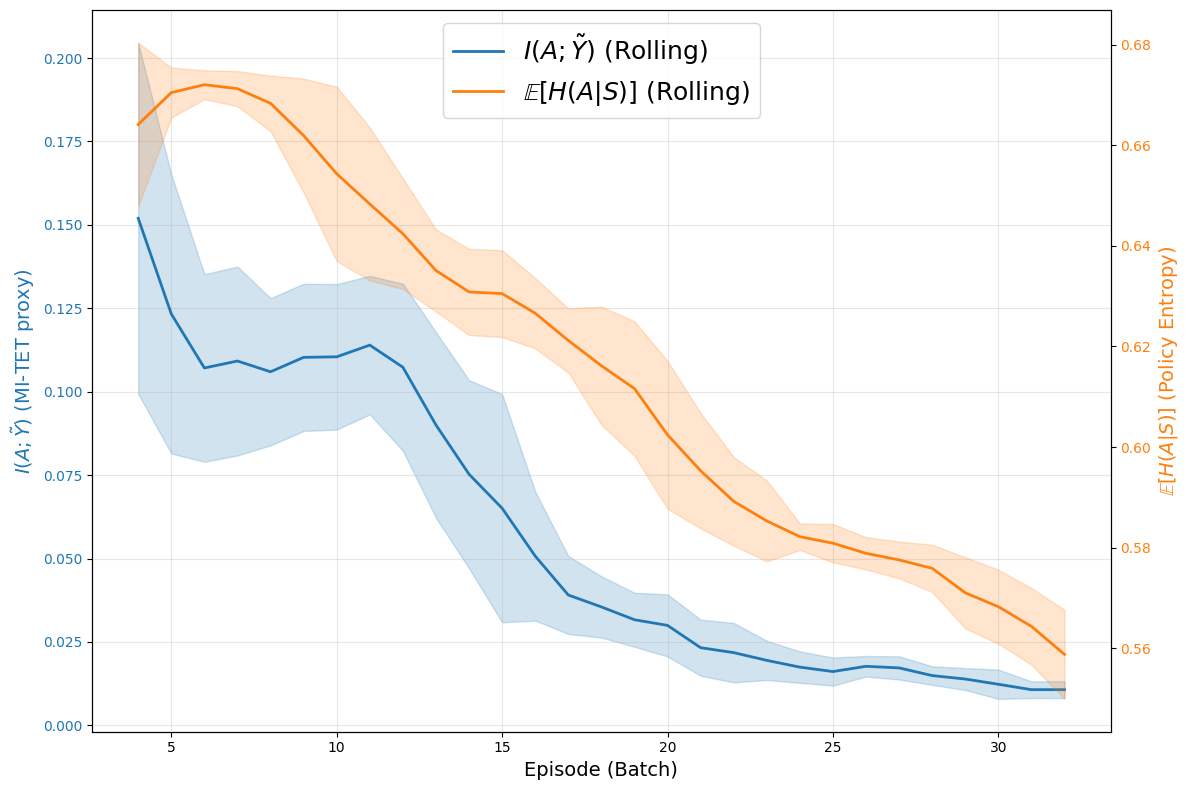

In [29]:
plot_dynamics_dual_axis('resuls_deep_BP.csv', 'Deep_BP')

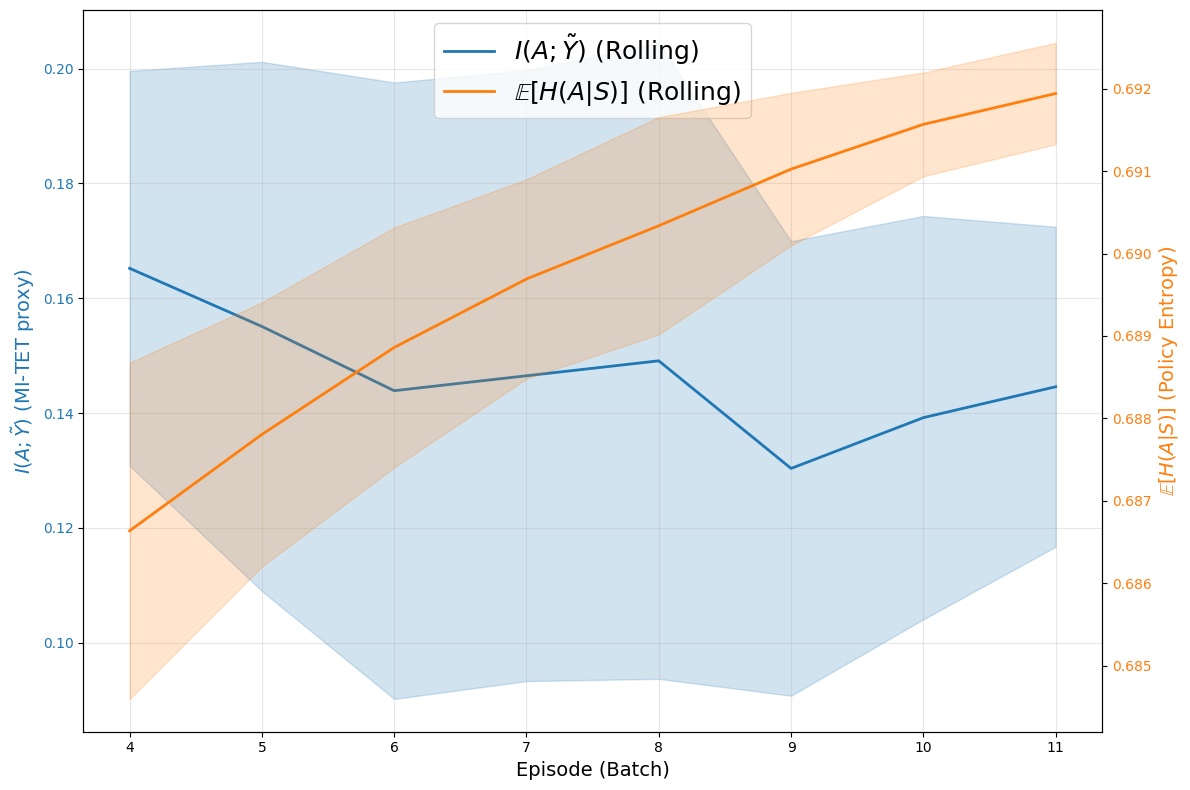

In [30]:
plot_dynamics_dual_axis('resuls_shallow.csv', 'shallow')

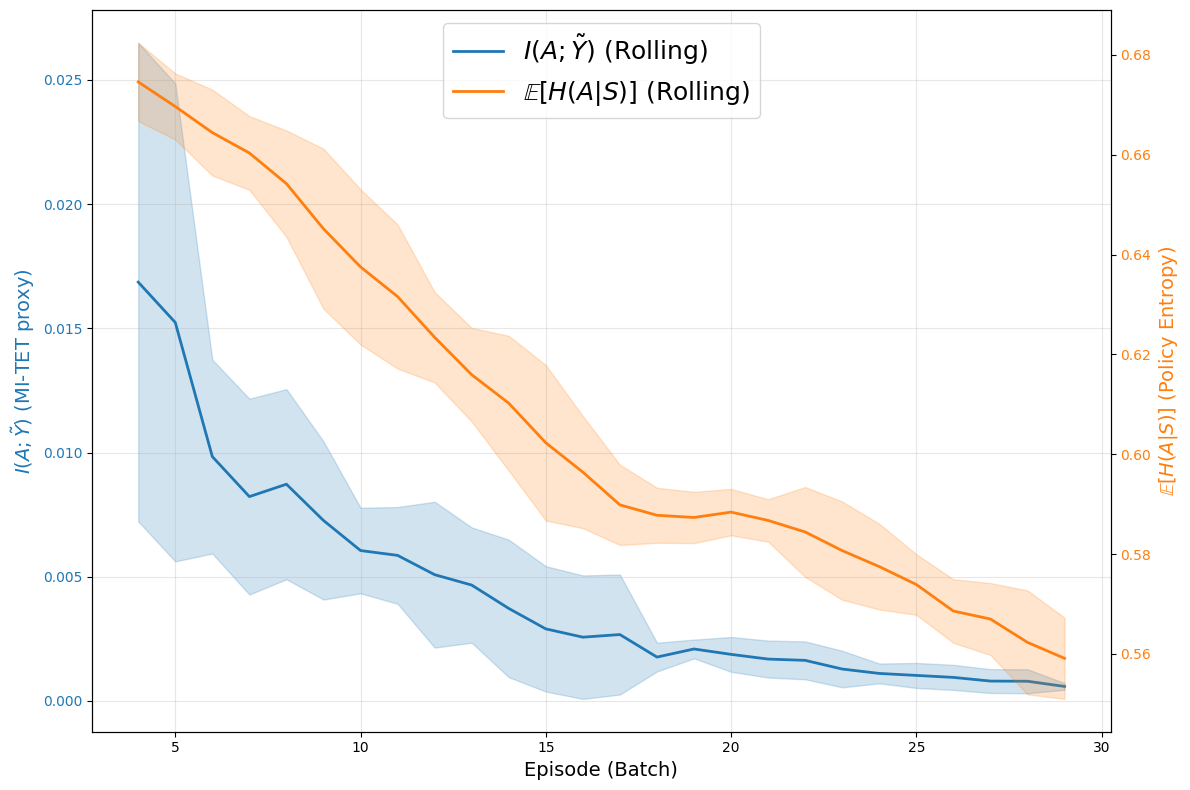

In [31]:
plot_dynamics_dual_axis('results_default.csv', 'default')

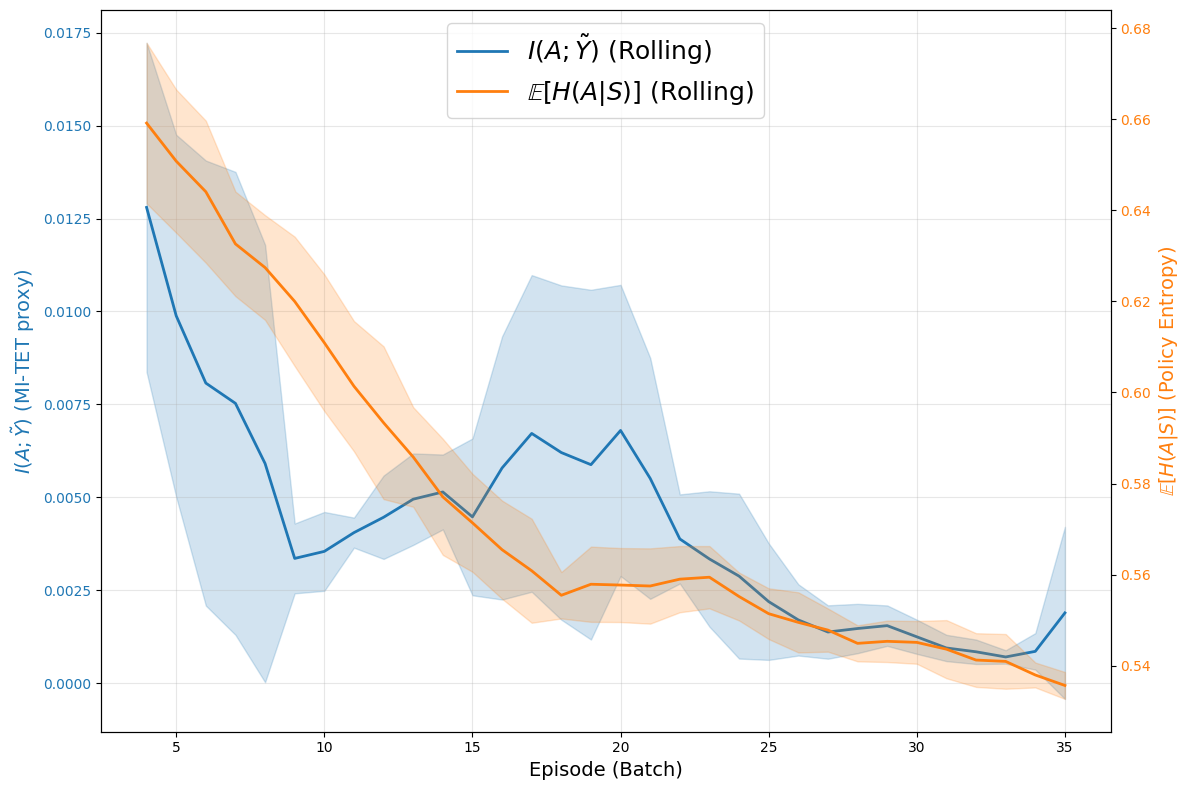

In [32]:
plot_dynamics_dual_axis('results_deep_BP.csv', 'deep_BP')

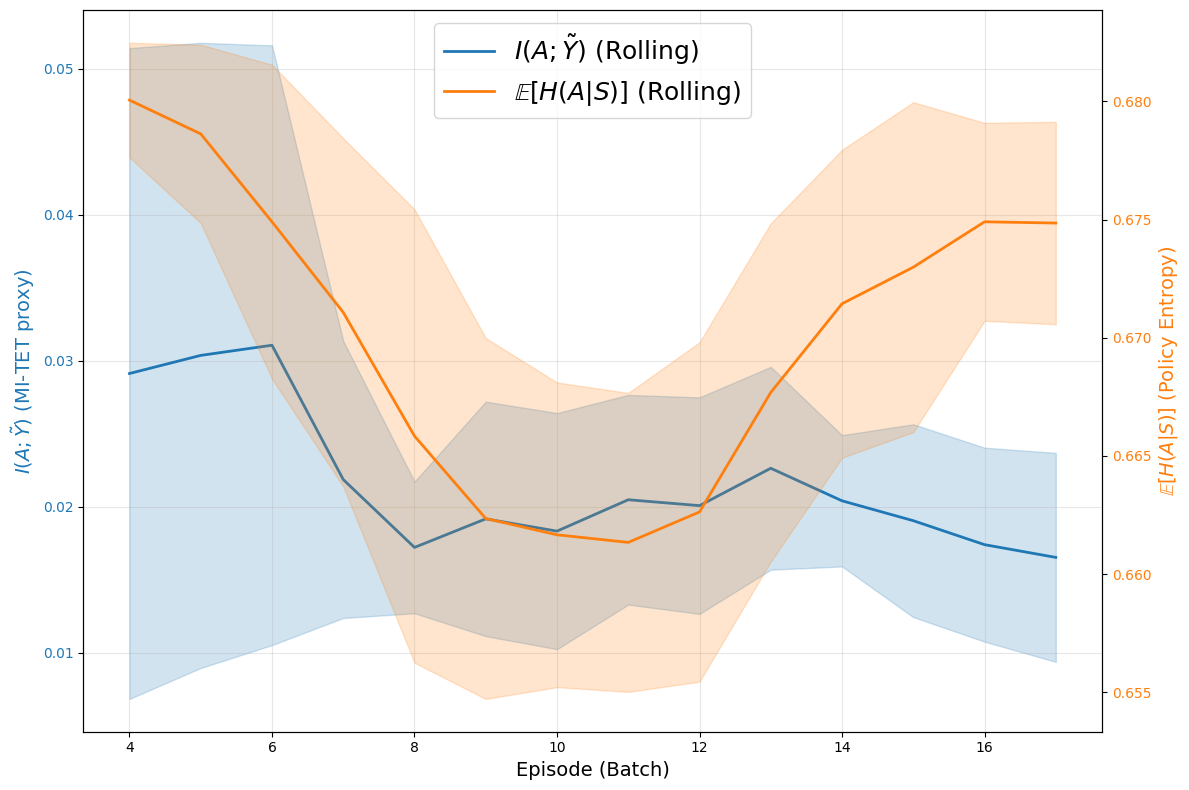

In [33]:
plot_dynamics_dual_axis('results_shallow.csv', 'shallow')